# Group 6: Artificial Intelligence Techniques Assignment

1. [SECTION 1: INTRODUCTION](#SECTION-1:-INTRODUCTION)
   
2. [SECTION 2: METHOD](#SECTION-2:-METHOD)
   1. [2.1: Data Description](#2.1:-Data-Description)
   2. [2.2: Data Exploration & Visualization](#2.2:-Data-Exploration-&-Visualization)
   3. [2.3: Data Preprocessing](#2.3:-Data-Preprocessing)
   4. [2.4: Model Training & Validation](#2.4:-Model-Training-&-Validation)
       1. [Model 1: Decision Tree Classifier](#Model-1:-Decision-Tree-Classifier)


# SECTION 1: INTRODUCTION

# SECTION 2: METHOD


In [155]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [69]:
# Load the dataset
ds = pd.read_csv('dataset.csv')

The “dataset.csv” dataset consists of 17 features (an individual’s demographic information,
eating habits, physical activities etc.) and one prediction output for three levels of cardiovascular
risk. The data contain certain complexity with missing data and noise. 

## 2.1: Data Description

In [72]:
# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
ds.head()

First Few Rows of the Dataset:


,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


In [104]:
# Display some important information of the data set
print("\nInformation of the data set:")
ds.info()


Information of the data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV        

In [74]:
# Get the shape of the dataset (number of rows and columns)
print("\nShape of the Dataset:")
print(f"Rows: {ds.shape[0]}, Columns: {ds.shape[1]}")


Shape of the Dataset:
Rows: 2100, Columns: 18


In [106]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
ds.isnull().any()


Missing Values in Each Column:


Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

In [76]:
# Display basic statistical information about the numerical columns
print("\nBasic Statistics of Numerical Features:")
ds.describe()


Basic Statistics of Numerical Features:


,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


In [77]:
# Display unique values in categorical columns to understand their distribution
categorical_columns = ds.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Features:")
for col in categorical_columns:
    print(f"{col}: {ds[col].unique()}")


Unique Values in Categorical Features:
Gender: ['Female' 'Male']
Family_history: ['no' 'yes']
Alcohol: ['low' 'none' 'medium' 'high']
Junk_food: ['yes' 'no']
Snack: ['Sometimes' 'Always' 'Frequently' 'No']
Smoking: ['no' 'yes']
Transportation: ['car' 'bus' 'walk' 'motorcycle' 'bicycle']
TV: ['rare' 'moderate' 'often']
Discipline: ['no' 'yes']
Cardiovascular_risk(y): ['medium' 'high' 'low']


## 2.2: Data Exploration & Visualization

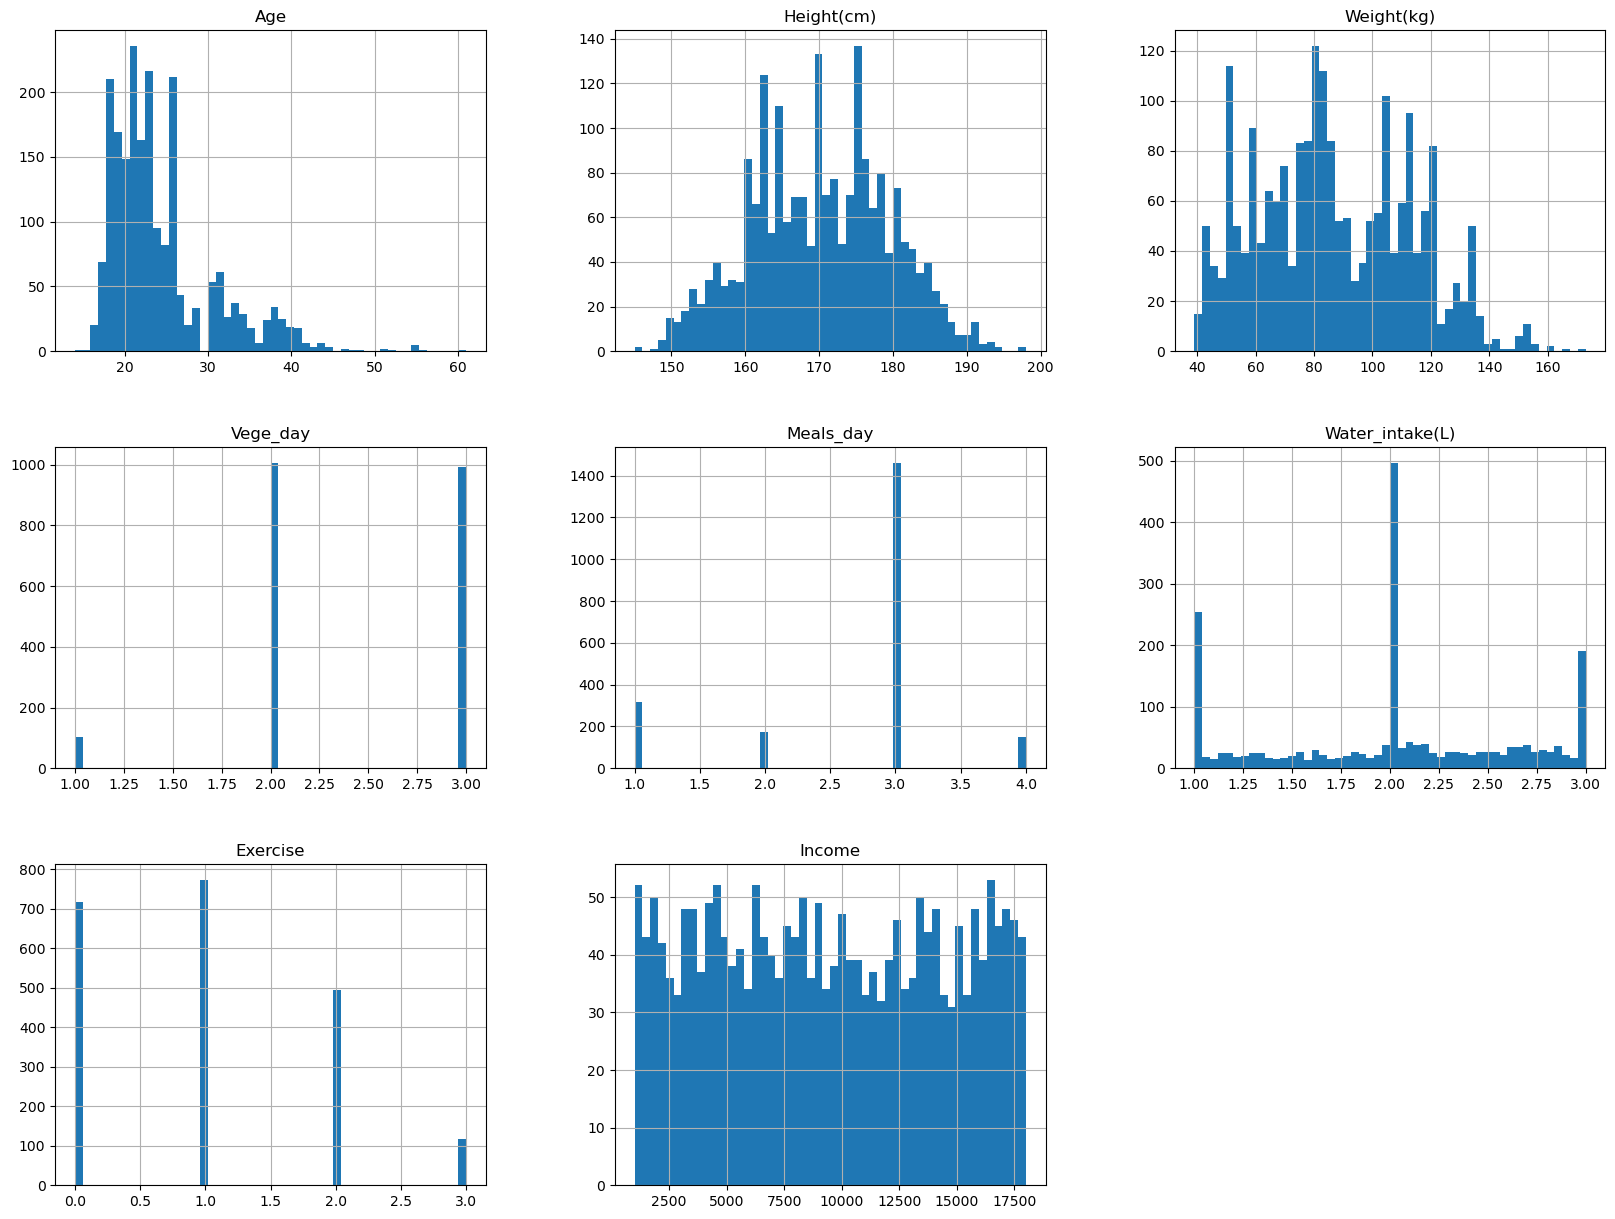

In [78]:
# Plotting histograms for all numerical features
ds.hist(bins=50, figsize=(20, 15))
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

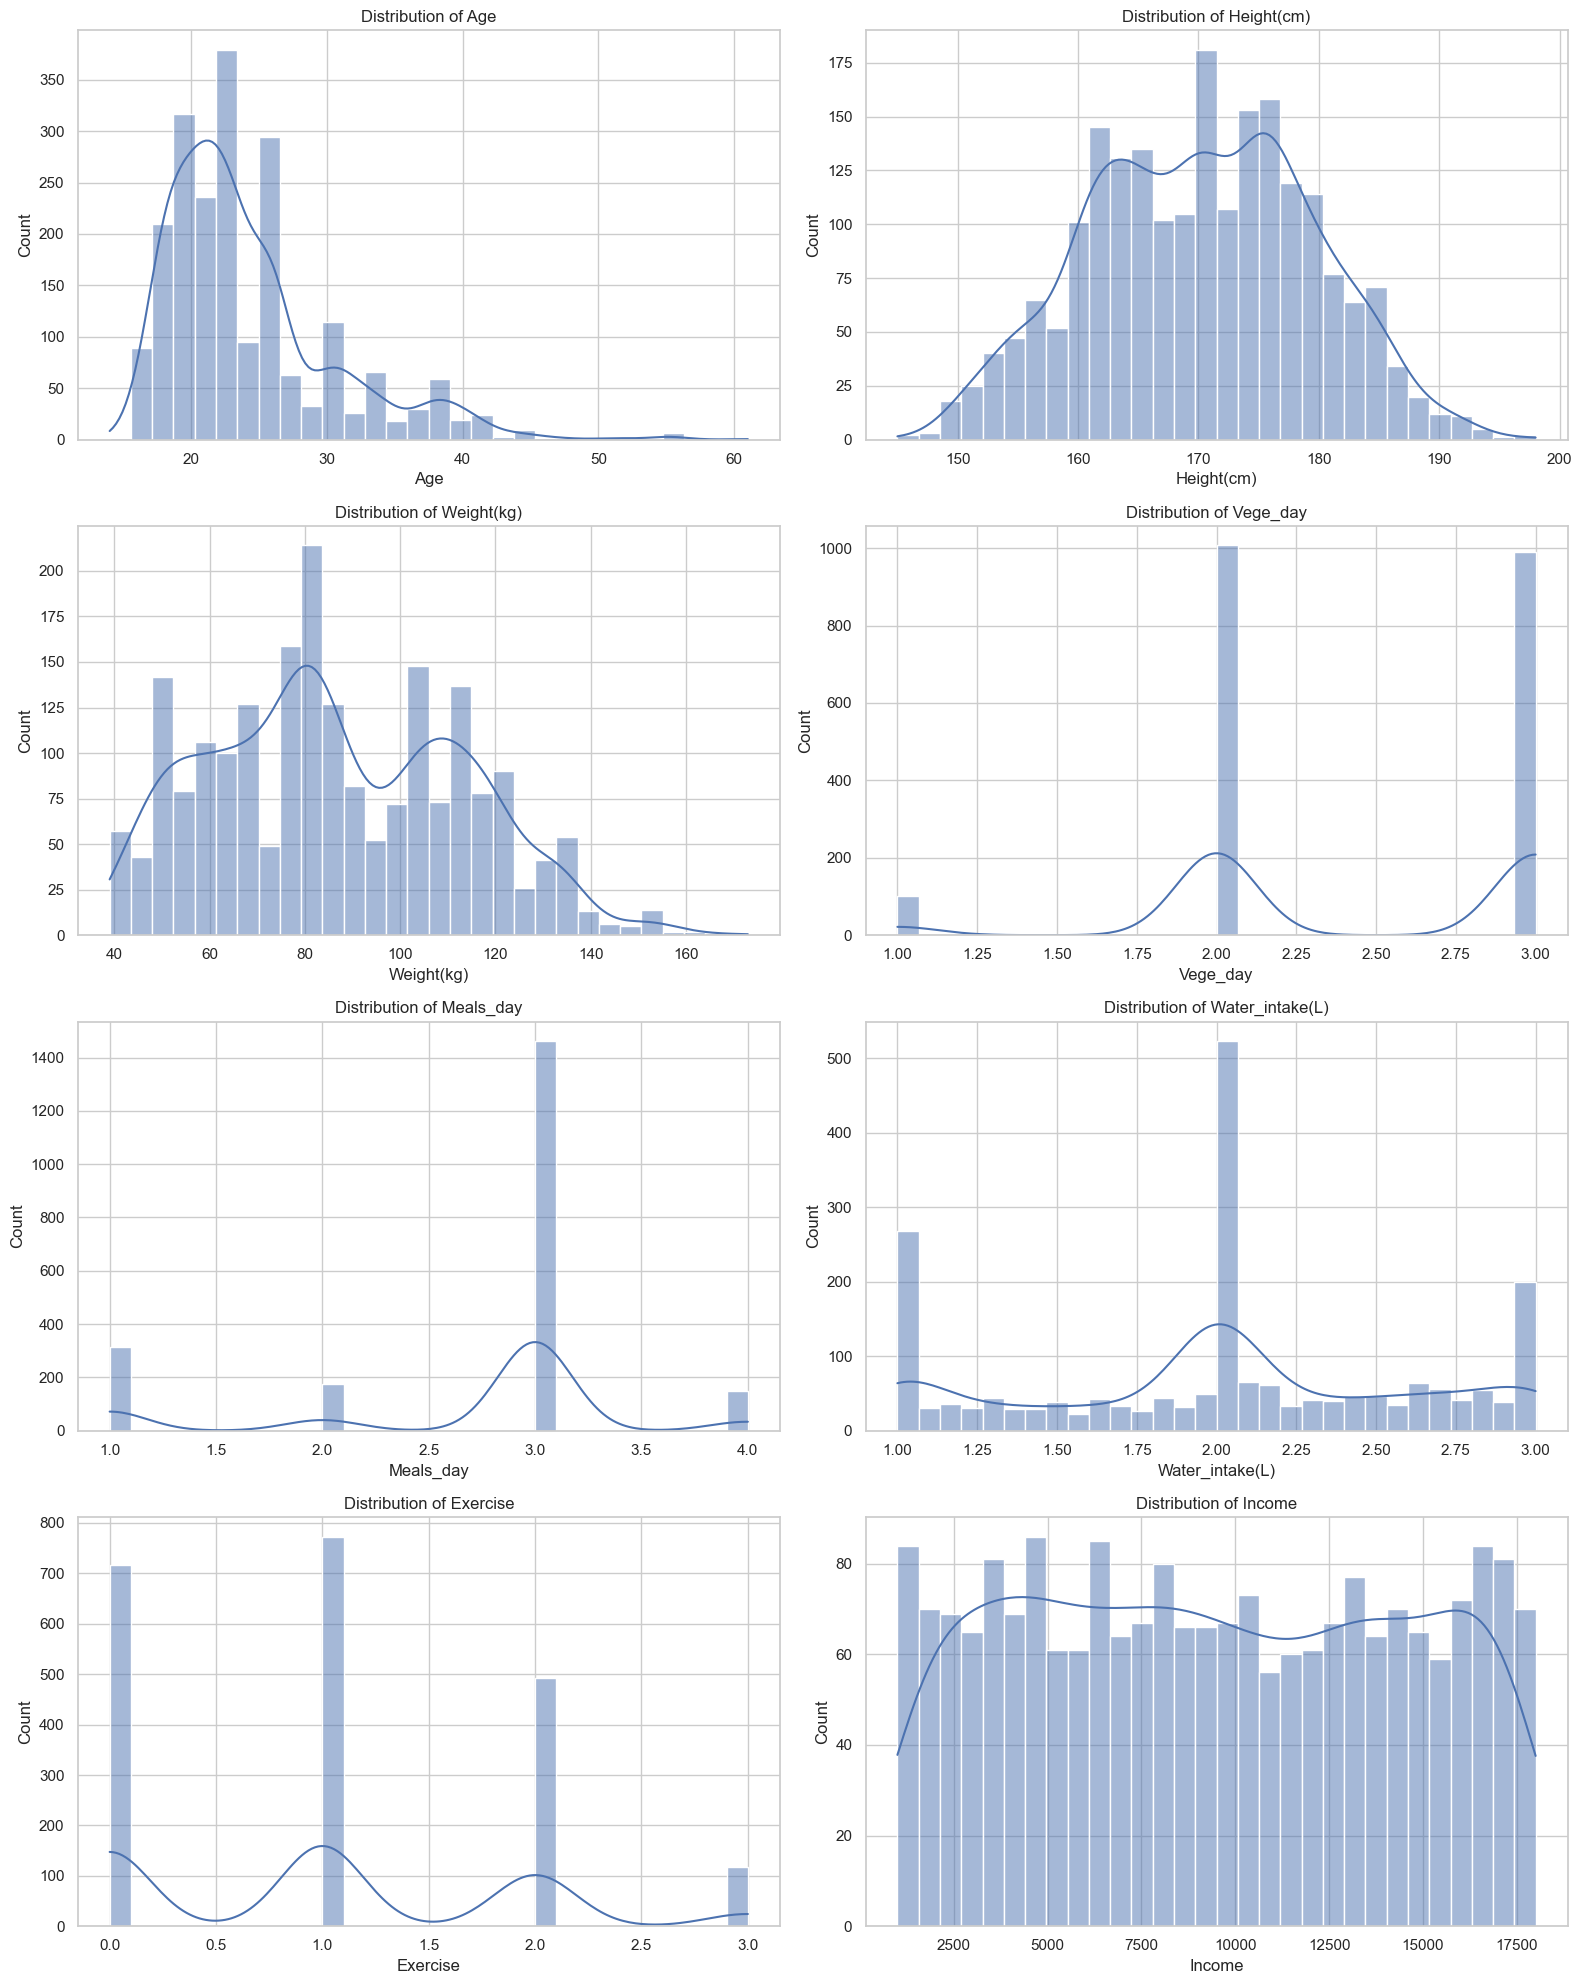

In [102]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a grid of subplots with 4 rows and 2 columns, and set the figure size
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))

# List all numerical features (columns) in the dataset 'ds'
numerical_features = ds.select_dtypes(include=['number']).columns.tolist()

# Loop through each numerical feature to create individual histograms
for i, feature in enumerate(numerical_features):
    # Plot histogram for each numerical feature with KDE (Kernel Density Estimate) overlaid
    sns.histplot(ds[feature], bins=30, kde=True, ax=axes[i//2, i%2])
    
    # Set the title for each subplot to indicate which feature is being plotted
    axes[i//2, i%2].set_title(f'Distribution of {feature}')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

plt.show()

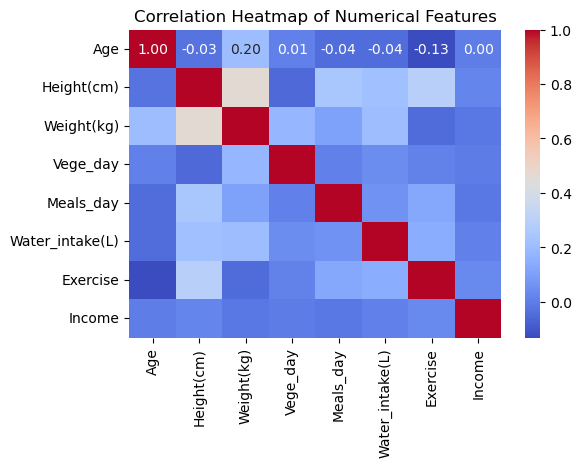

In [79]:
# Calculate the correlation matrix for numerical features only
numerical_ds = ds.select_dtypes(include=[float, int])
corr_matrix = numerical_ds.corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


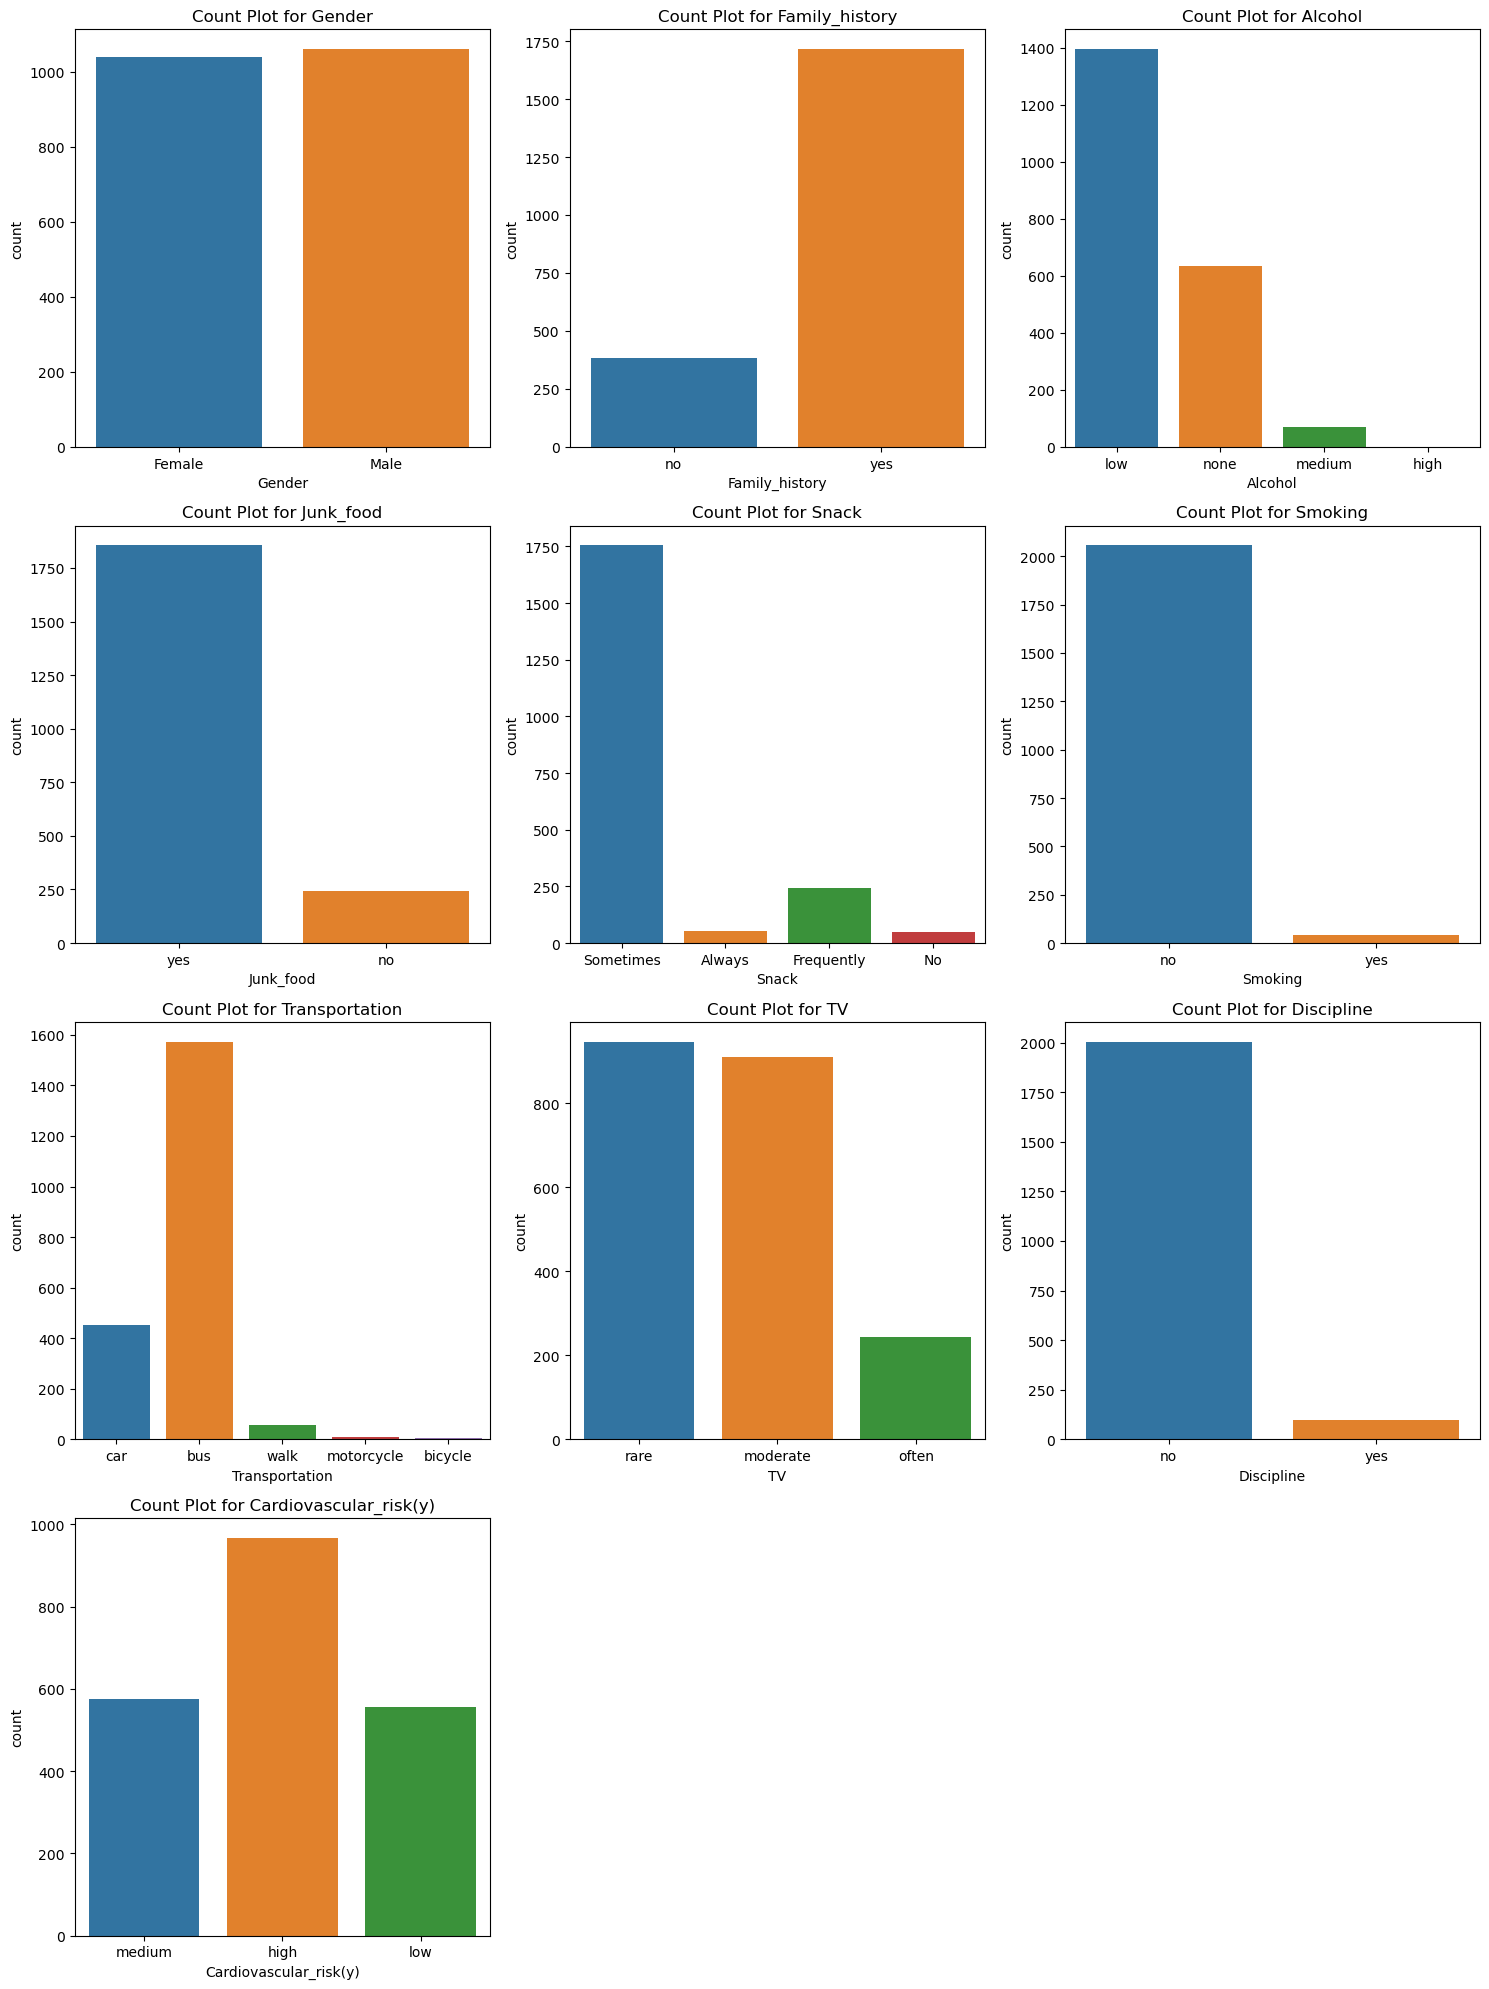

In [88]:
# Automatically identify all categorical features in the dataset
categorical_features = ds.select_dtypes(include=['object']).columns.tolist()

# Set up the number of rows and columns for the grid
n_rows = (len(categorical_features) + 2) // 3  # Calculate number of rows needed (3 columns per row)
n_cols = 3  # You can adjust this based on how many columns you want per row

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize dynamically based on n_rows

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical feature and create a count plot on a subplot
for i, feature in enumerate(categorical_features):
    sns.countplot(data=ds, x=feature, ax=axes[i])
    axes[i].set_title(f'Count Plot for {feature}')

# Hide any empty subplots if the grid is larger than the number of features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

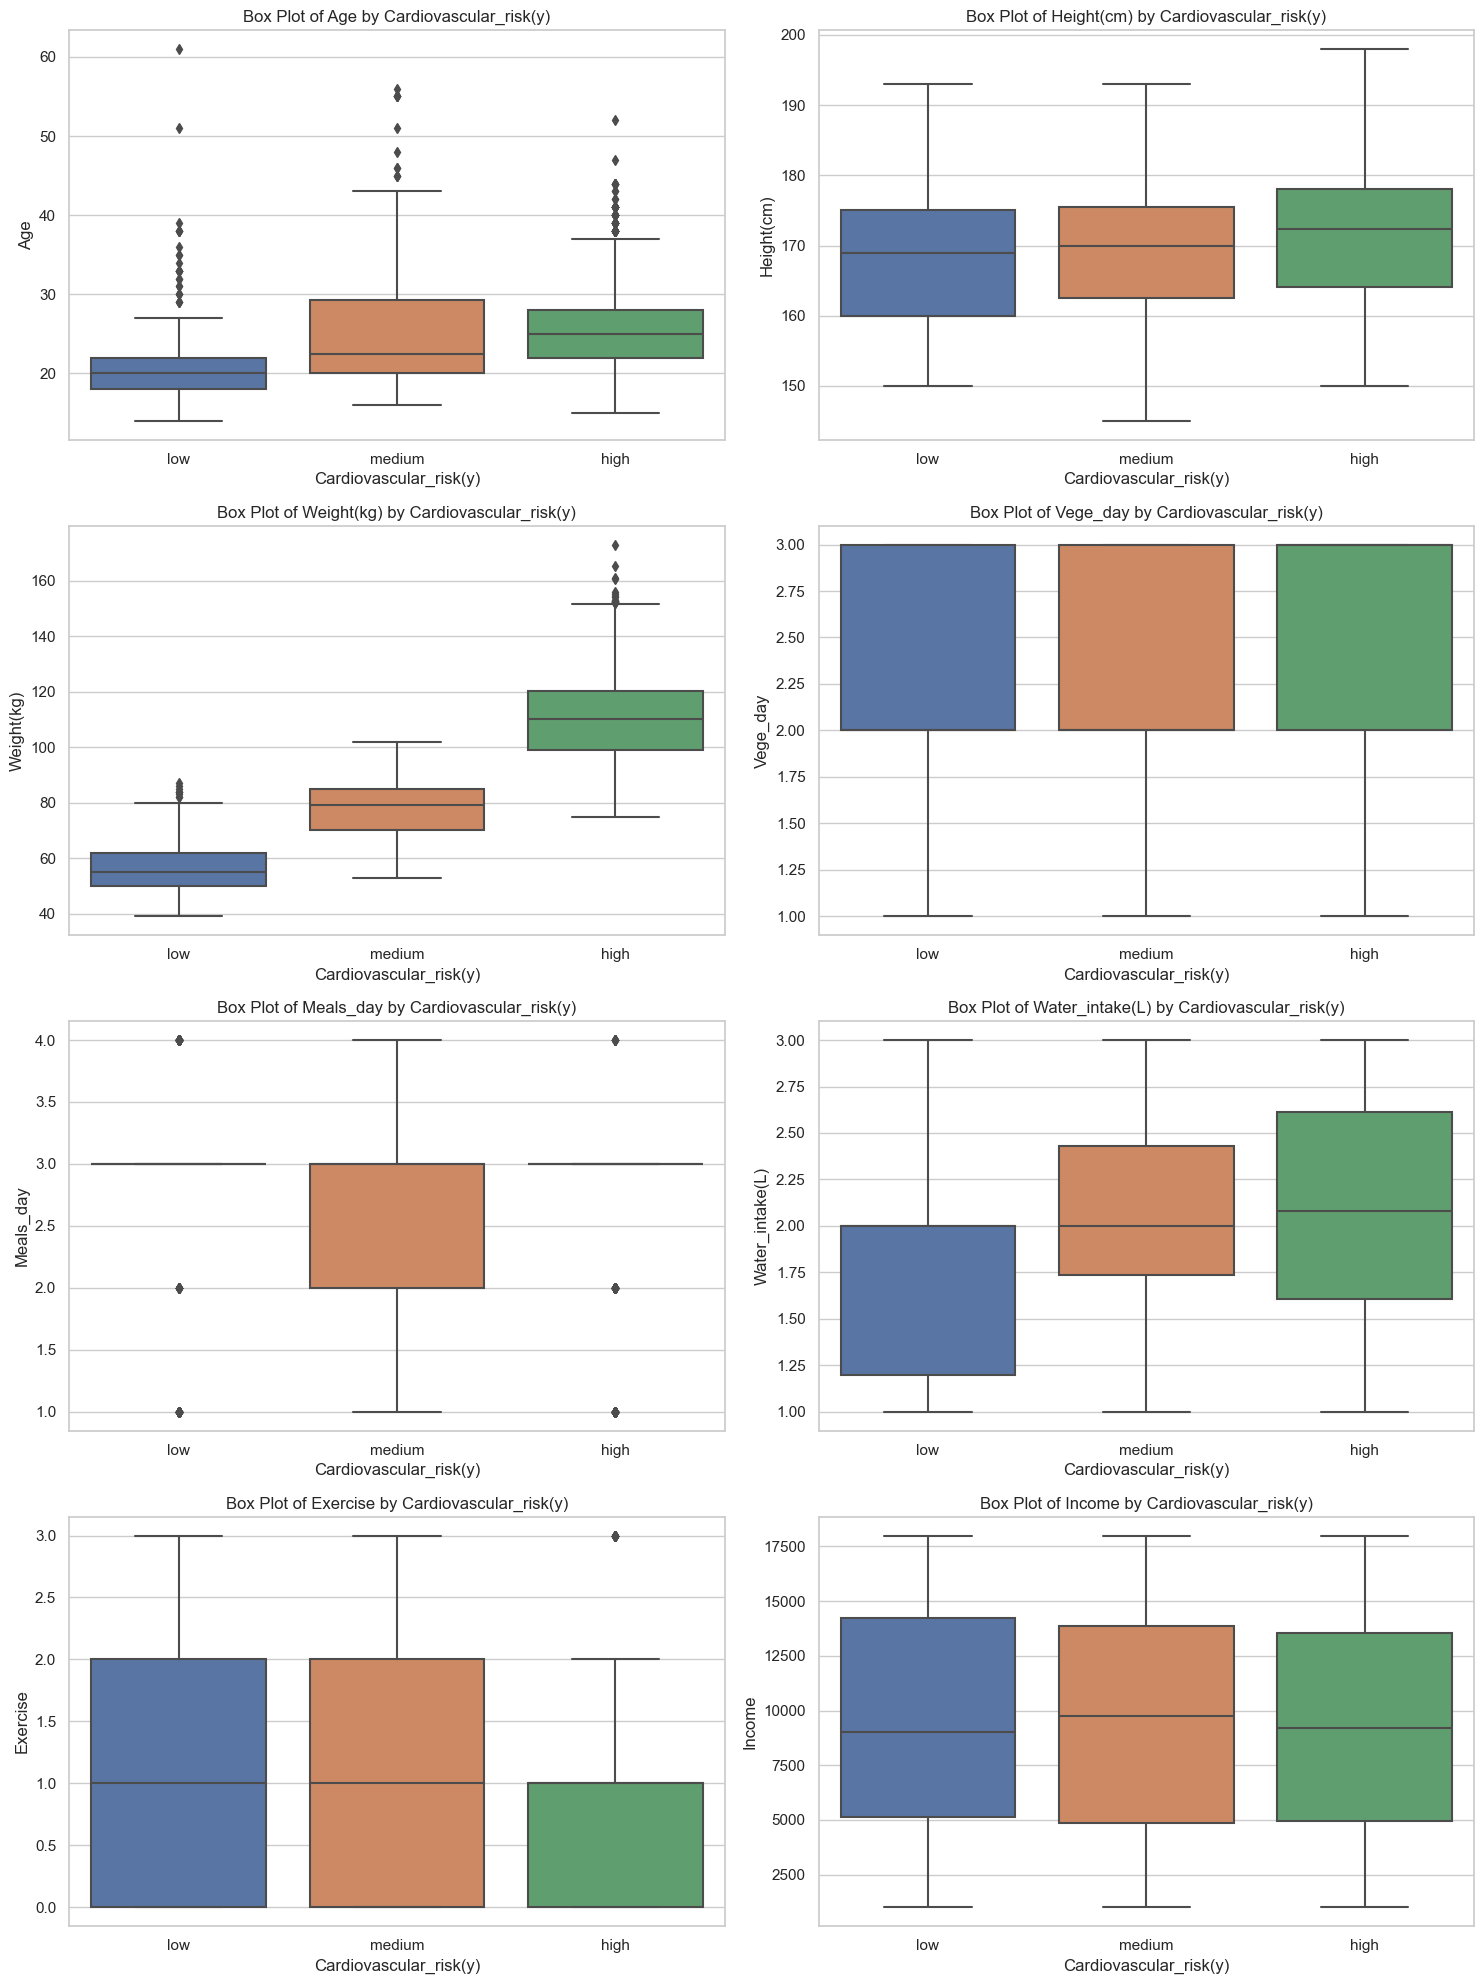

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset (assuming it is loaded as 'ds')
# ds = pd.read_csv('dataset.csv')  # Uncomment and modify if the dataset needs to be loaded

# List all numerical features (columns) in the dataset 'ds'
numerical_features = ds.select_dtypes(include=['number']).columns.tolist()

# Define the categorical variable for comparison
categorical_variable = 'Cardiovascular_risk(y)'  # Replace with your actual categorical variable

# Specify the desired order of categories
category_order = ['low', 'medium', 'high']

# Set up the number of rows and columns for the grid
n_rows = (len(numerical_features) + 1) // 2  # Calculate number of rows needed (2 columns per row)
n_cols = 2  # Number of columns

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize dynamically based on n_rows

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a box plot on a subplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=categorical_variable, y=feature, data=ds, ax=axes[i], order=category_order)
    axes[i].set_title(f'Box Plot of {feature} by {categorical_variable}')
    axes[i].set_xlabel(categorical_variable)
    axes[i].set_ylabel(feature)

# Hide any empty subplots if there are fewer features than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## 2.3: Data Preprocessing 

In [135]:
# Step 1: Split the input features (X) and output prediction (y)
X = ds.drop('Cardiovascular_risk(y)', axis=1)
y = ds['Cardiovascular_risk(y)']

In [136]:
# Print the shape and type information
print('Shape of original dataset:', ds.shape)
print('X: shape=', X.shape, 'type=', type(X))
print('y: shape=', y.shape, 'type=', type(y))

Shape of original dataset: (2100, 18)
X: shape= (2100, 17) type= <class 'pandas.core.frame.DataFrame'>
y: shape= (2100,) type= <class 'pandas.core.series.Series'>


In [137]:
# 2. Train-Test Split (before preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# Step 3: Split X_train into numerical and categorical features
X_train_num = X_train.drop(['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline'], axis=1)
X_train_cat = X_train[['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline']]
X_test_cat = X_test[['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline']]

# Print the shape of numerical and categorical splits
print('Numerical Features Training Shape:', X_num_train.shape)
print('Categorical Features Training Shape:', X_cat_train.shape)

Numerical Features Training Shape: (1680, 8)
Categorical Features Training Shape: (1680, 9)


In [139]:
# Step 4: Ordinal Encoding for the target variable
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
y_train = ordinal_encoder.fit_transform(y_train.values.reshape(-1, 1))  # Fit and transform on training data
y_test = ordinal_encoder.transform(y_test.values.reshape(-1, 1))  # Transform on testing data


In [140]:
# Step 5: Standardize numerical features
scaler = StandardScaler()
X_train_num_tr = scaler.fit_transform(X_num_train)  # Fit and transform the scaler on training numerical data

In [160]:
# Step 6: Encode categorical data using LabelBinarizer
X_train_cat_tr = []
X_test_cat_tr = []

# Loop through each categorical feature and apply LabelBinarizer
for column in X_train_cat.columns:
    lb_encoder = LabelBinarizer()
    lb_encoder.fit(X_train_cat[column])
    
    # Transform training and test data
    X_train_cat_tr = lb_encoder.transform(X_train_cat[column])
    X_test_cat_tr = lb_encoder.transform(X_test_cat[column])
    
# Concatenate transformed data to the arrays
X_train_cat_tr = np.hstack((X_train_cat_tr, X_train_cat_tr))
X_test_cat_tr = np.hstack((X_test_cat_tr, X_test_cat_tr))


In [172]:
# Step 7: Combine the transformed numerical and categorical sets
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_tr])  # Combine numerical and categorical transformed features
y_train = y_train.ravel()  # Convert y_train to 1D numpy array

In [173]:
print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)

X_train_tr shape: (1680, 10)
y_train shape: (1680,)


In [174]:
# Step 7: Combine the transformed numerical and categorical sets
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_tr])  # Combine numerical and categorical transformed features
X_test_num_tr = scaler.transform(X_test[X_train_num.columns])  # Transform test numerical data
X_test_tr = np.hstack([X_test_num_tr, X_test_cat_tr])  # Combine numerical and categorical transformed features

In [175]:
# Convert y_train and y_test to numpy arrays for compatibility
y_train = y_train.ravel()
y_test = y_test.ravel()

In [176]:
print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)
print('X_test_tr shape:', X_test_tr.shape)
print('y_test shape:', y_test.shape)

X_train_tr shape: (1680, 10)
y_train shape: (1680,)
X_test_tr shape: (420, 10)
y_test shape: (420,)


## 2.4: Model Training & Validation